In [1]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [70]:
import pandas as pd
salary_data = pd.read_csv('SalaryData_Train.csv')
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [72]:
salary_data.shape

(30161, 14)

In [73]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [74]:
salary_data[salary_data.duplicated()].shape

(3258, 14)

In [75]:
salary_data.drop_duplicates(inplace=True)

In [76]:
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [77]:
categorical_features = salary_data.describe(include=["object",'category']).columns
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [78]:
numerical_features = salary_data.describe(include=["int64","float64"]).columns
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

<ipython-input-79-d90d36cbcac7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


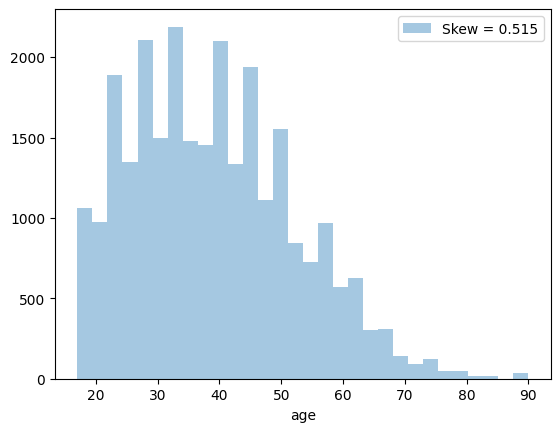

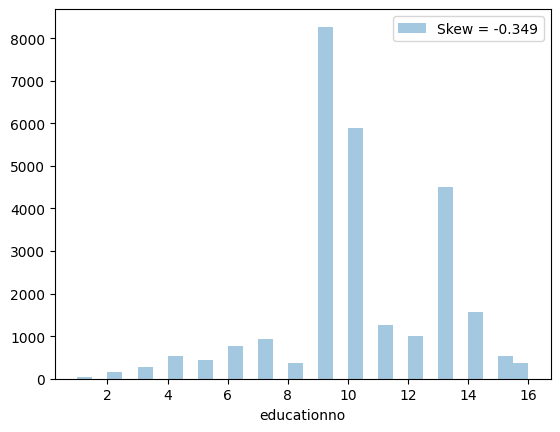

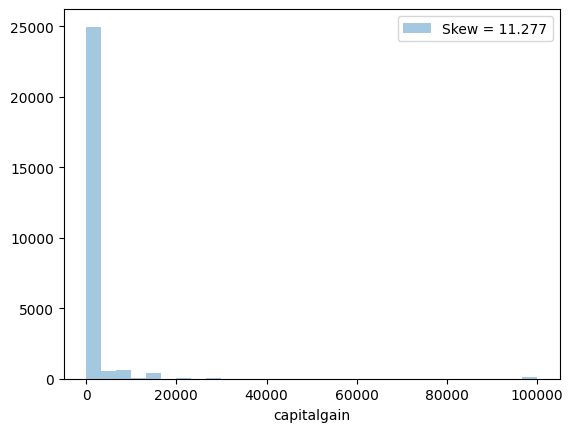

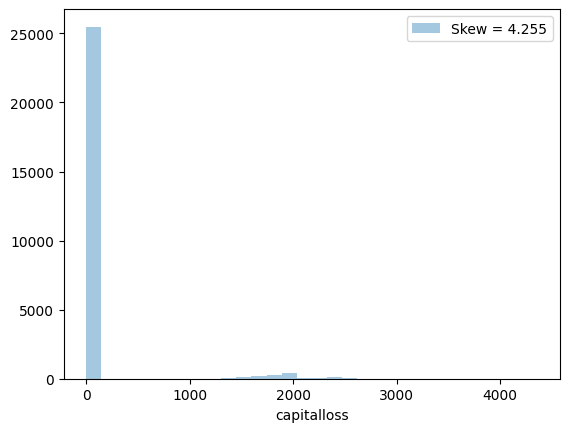

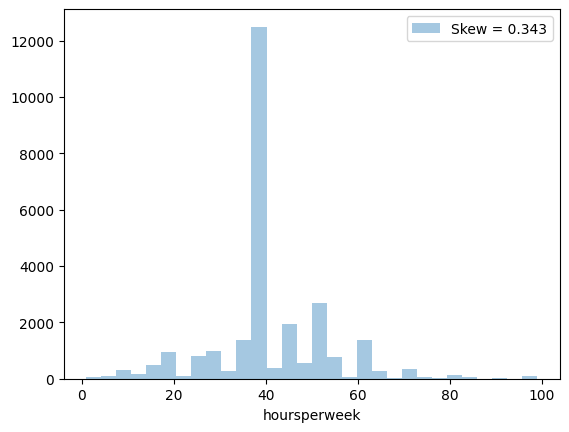

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_features:
    skew = salary_data[i].skew()
    sns.distplot(salary_data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [80]:
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

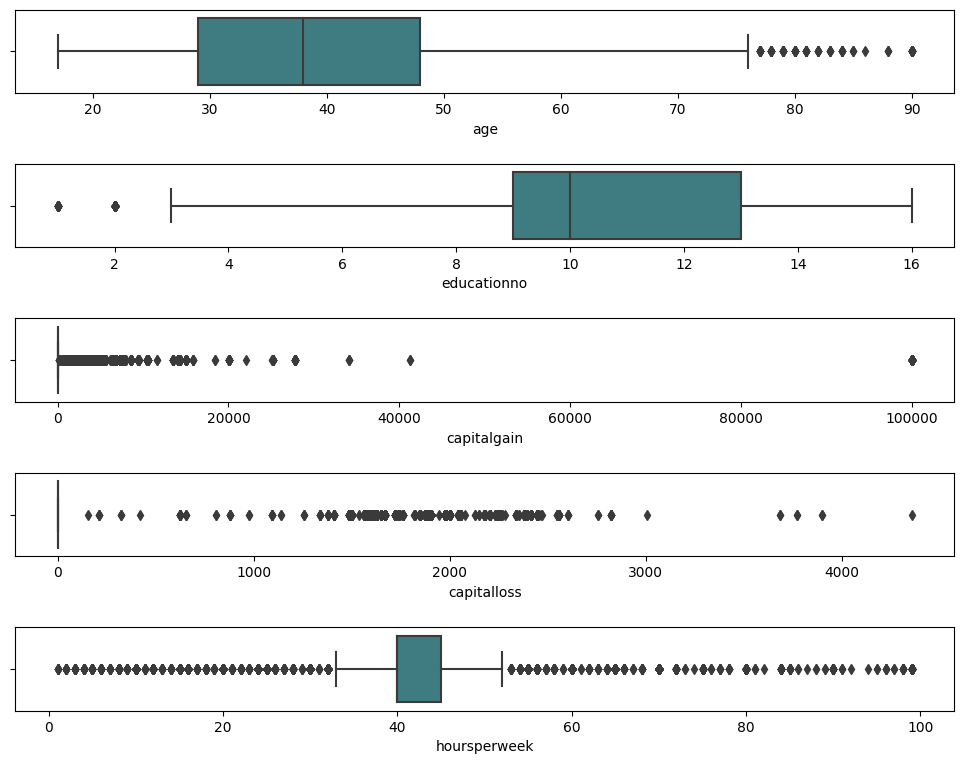

In [81]:
fig, axes = plt.subplots(5,1,figsize=(10,8),sharex=False,sharey=False)
sns.boxplot(x='age', data= salary_data,palette='crest',ax=axes[0])
sns.boxplot(x='educationno',data= salary_data,palette='crest',ax=axes[1])
sns.boxplot(x='capitalgain',data= salary_data,palette='crest',ax=axes[2])
sns.boxplot(x='capitalloss',data= salary_data,palette='crest',ax=axes[3])
sns.boxplot(x='hoursperweek',data= salary_data,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

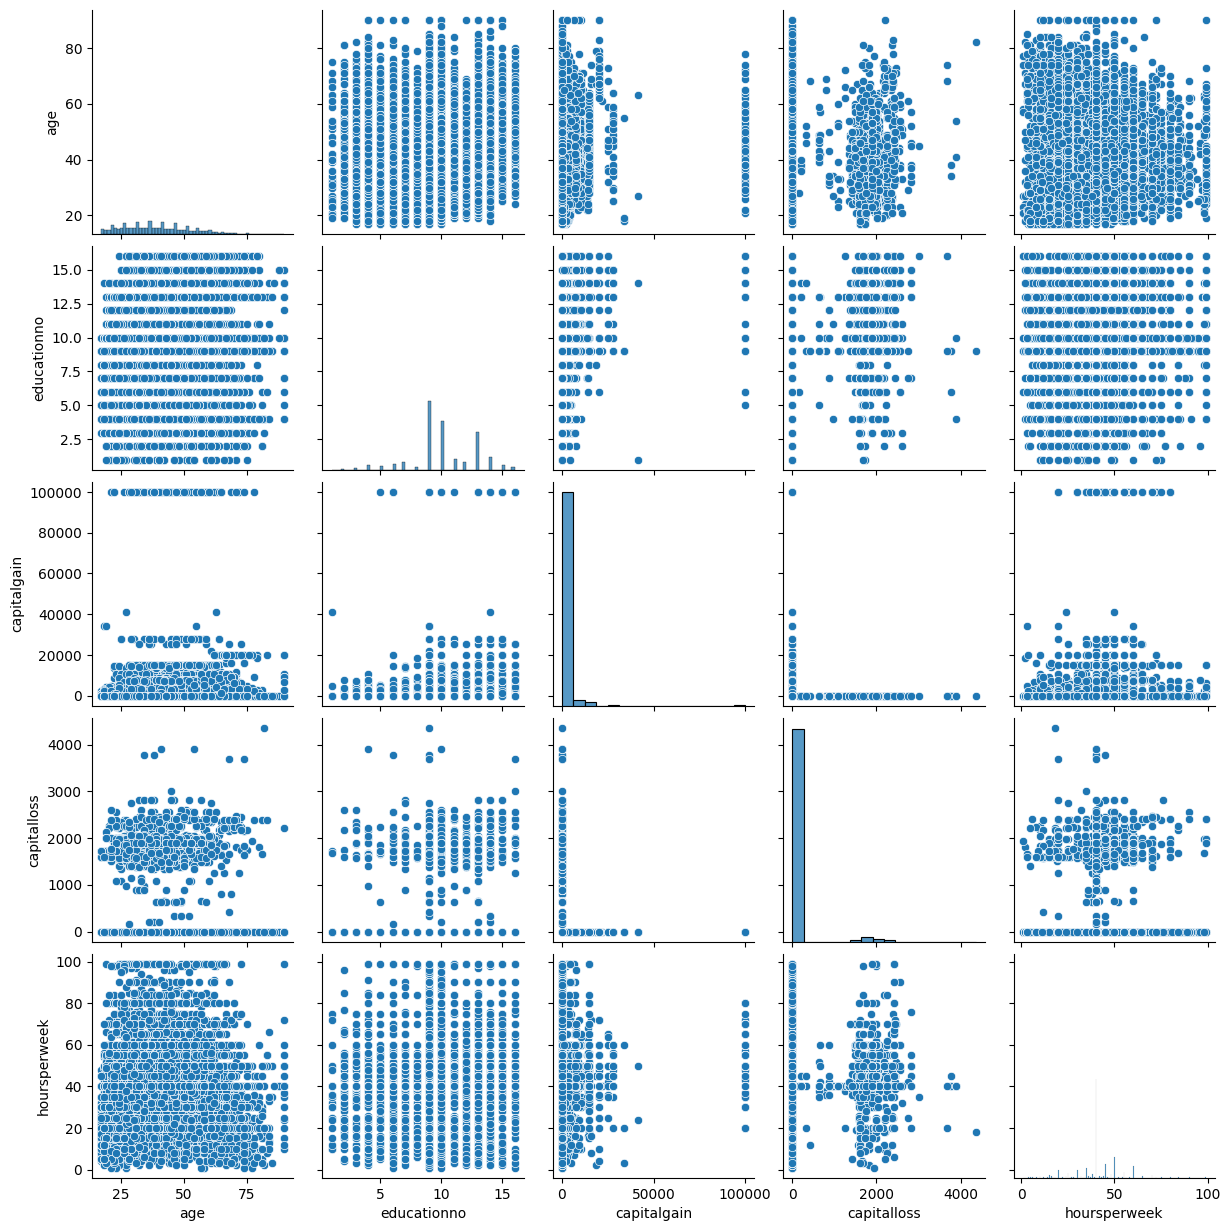

In [82]:
sns.pairplot(salary_data)
plt.show()

<ipython-input-83-610a2510c255>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salary_data.corr(), annot=True, fmt='.2g', cmap="viridis")


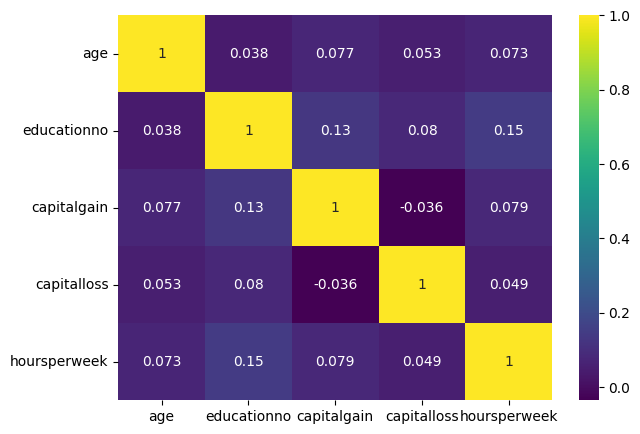

In [83]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(salary_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [84]:
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [85]:
from sklearn import preprocessing
label_enocoder = preprocessing.LabelEncoder()
salary_data['workclass1'] = label_enocoder.fit_transform(salary_data['workclass'])
salary_data['education1'] = label_enocoder.fit_transform(salary_data['education'])
salary_data['maritalstatus1'] = label_enocoder.fit_transform(salary_data['maritalstatus'])
salary_data['occupation1'] = label_enocoder.fit_transform(salary_data['occupation'])
salary_data['relationship1'] = label_enocoder.fit_transform(salary_data['relationship'])
salary_data['race1'] = label_enocoder.fit_transform(salary_data['race'])
salary_data['sex1'] = label_enocoder.fit_transform(salary_data['sex'])
salary_data['native1'] = label_enocoder.fit_transform(salary_data['native'])
salary_data['Salary1'] = label_enocoder.fit_transform(salary_data['Salary'])

In [86]:
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,Salary,workclass1,education1,maritalstatus1,occupation1,relationship1,race1,sex1,native1,Salary1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,<=50K,5,9,4,0,1,4,1,37,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,<=50K,4,9,2,3,0,4,1,37,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,<=50K,2,11,0,5,1,4,1,37,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,<=50K,2,1,2,5,0,2,1,37,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,<=50K,2,9,2,9,5,2,0,4,0


In [87]:
salary_data.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary'],inplace=True,axis=1)

In [88]:
salary_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass1,education1,maritalstatus1,occupation1,relationship1,race1,sex1,native1,Salary1
0,39,13,2174,0,40,5,9,4,0,1,4,1,37,0
1,50,13,0,0,13,4,9,2,3,0,4,1,37,0
2,38,9,0,0,40,2,11,0,5,1,4,1,37,0
3,53,7,0,0,40,2,1,2,5,0,2,1,37,0
4,28,13,0,0,40,2,9,2,9,5,2,0,4,0


In [89]:
salary_data.rename(columns={'workclass1':'workclass','education1':'education','maritalstatus1':'maritalstatus','occupation1':'occupation','relationship1':'relationship','race1':'race','sex1':'sex','native1':'native','Salary1':'Salary'},inplace=True)
salary_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,39,13,2174,0,40,5,9,4,0,1,4,1,37,0
1,50,13,0,0,13,4,9,2,3,0,4,1,37,0
2,38,9,0,0,40,2,11,0,5,1,4,1,37,0
3,53,7,0,0,40,2,1,2,5,0,2,1,37,0
4,28,13,0,0,40,2,9,2,9,5,2,0,4,0


In [90]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

In [91]:
X = salary_data.iloc[:,:-1]
Y = salary_data.iloc[:,-1]

In [92]:
clf.fit(X,Y)

CategoricalNB()